<a href="https://colab.research.google.com/github/jj2883/DL_on_Categorical_Var_Classification/blob/master/DeepL_Classifying_mult_var_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import json
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os.path as osp
from pathlib import Path


BASE_TRUTH_DIR = Path('/content/drive/My Drive/ML_hw5')

train_path = str(BASE_TRUTH_DIR / 'hw5-trainingset-jj2883.csv')
test_path = str(BASE_TRUTH_DIR / 'hw5-testset-jj2883.csv')
codebook_path = str(BASE_TRUTH_DIR / 'CodeBook-SELECT.csv')


In [61]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
codebook_data = pd.read_csv(codebook_path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,53,54,55,56,255,256,257,258,260,268,376) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,255,256,257,258,260,268) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 380 entries, cntryid to uni
dtypes: float64(82), int64(4), object(294)
memory usage: 58.0+ MB


In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 380 entries, cntryid to uni
dtypes: float64(80), int64(1), object(299)
memory usage: 58.0+ MB


In [0]:
var_name = codebook_data['VarName'].tolist()
var_name

y_train_data = train_data['job_performance']


# get variable names with specific data type
train_var_name_obj = list(train_data.select_dtypes(include=['object']).columns)
train_var_name_float = list(train_data.select_dtypes(include=['float64']).columns)
train_var_name_int = list(train_data.select_dtypes(include=['int64']).columns)


test_var_name_obj = list(test_data.select_dtypes(include=['object']).columns)
test_var_name_float = list(test_data.select_dtypes(include=['float64']).columns)
test_var_name_int = list(test_data.select_dtypes(include=['int64']).columns)


In [65]:
#get column with different data type between test and training 
obj_diff=list(set(train_var_name_obj) - set(test_var_name_obj))

obj_diff

['isco2l', 'isco1c', 'v71', 'isco1l', 'isco2c']

In [0]:
#remove different data type columns
train_data = train_data.drop(obj_diff, axis=1)
test_data = test_data.drop(obj_diff, axis=1)
#train_data = train_data.drop('job_performance', axis=1)
#test_data = test_data.drop('job_performance', axis=1)


train_var_name_obj = list(train_data.select_dtypes(include=['object']).columns)
train_var_name_float = list(train_data.select_dtypes(include=['float64']).columns)
train_var_name_int = list(train_data.select_dtypes(include=['int64']).columns)


test_var_name_obj = list(test_data.select_dtypes(include=['object']).columns)
test_var_name_float = list(test_data.select_dtypes(include=['float64']).columns)
test_var_name_int = list(test_data.select_dtypes(include=['int64']).columns)


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 375 entries, cntryid to uni
dtypes: float64(80), int64(1), object(294)
memory usage: 57.2+ MB


In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 375 entries, cntryid to uni
dtypes: float64(80), int64(1), object(294)
memory usage: 57.2+ MB


In [70]:
x_train_data_float = train_data.drop(train_var_name_obj, axis=1)
x_train_data_obj = train_data.drop(train_var_name_float, axis=1)

x_test_data_float = test_data.drop(test_var_name_obj, axis=1)
x_test_data_obj = test_data.drop(test_var_name_float, axis=1)


#fill NaN in float data type
x_train_data_float = x_train_data_float.fillna(0)
x_test_data_float = x_test_data_float.fillna(0)

# x_train_data = x_train_data.values
# y_train_data = y_train_data.values

#X_train_ordinal = x_train_data.values
#Y_train_ordinal = y_train_data.values


x_test_data_obj.shape

(20000, 295)

In [71]:
print(x_train_data_obj.shape)
print(x_test_data_obj.shape)

(20000, 295)
(20000, 295)


In [72]:
x_train_data_obj_dummy = pd.get_dummies(x_train_data_obj)
x_test_data_obj_dummy = pd.get_dummies(x_test_data_obj)



print(x_test_data_obj_dummy.head())
print(x_train_data_obj_dummy.head())

      row  ...  uni_jj2883
0  115976  ...           1
1   47898  ...           1
2  170433  ...           1
3  163680  ...           1
4   70699  ...           1

[5 rows x 2158 columns]
      row  cntryid_Austria  ...  v127_ISCED 5B  uni_jj2883
0  190496                0  ...              0           1
1  157699                0  ...              0           1
2   97425                0  ...              0           1
3   79691                0  ...              0           1
4  142031                0  ...              0           1

[5 rows x 2165 columns]


In [0]:
#Get the different columns 
enc_diff1=list(set(x_train_data_obj_dummy) - set(x_test_data_obj_dummy))
enc_diff2=list(set(x_test_data_obj_dummy) - set(x_train_data_obj_dummy))
#print(enc_diff1)
#print(enc_diff2)

In [74]:
#Drop the column with difference
x_train_data_obj_clean = x_train_data_obj_dummy.drop(enc_diff1, axis=1)
x_test_data_obj_clean = x_test_data_obj_dummy.drop(enc_diff2, axis=1)


print(x_train_data_obj_clean.head())
print(x_test_data_obj_clean.head())

      row  cntryid_Austria  ...  v127_ISCED 5B  uni_jj2883
0  190496                0  ...              0           1
1  157699                0  ...              0           1
2   97425                0  ...              0           1
3   79691                0  ...              0           1
4  142031                0  ...              0           1

[5 rows x 2064 columns]
      row  cntryid_Austria  ...  v127_ISCED 5B  uni_jj2883
0  115976                0  ...              0           1
1   47898                0  ...              0           1
2  170433                0  ...              0           1
3  163680                0  ...              0           1
4   70699                0  ...              0           1

[5 rows x 2064 columns]


In [0]:
x_train_data_enc = pd.concat([x_train_data_float,x_train_data_obj_clean], axis=1)
x_train_data_enc = x_train_data_enc.loc[:,~x_train_data_enc.columns.duplicated()]

x_pred_data_enc = pd.concat([x_test_data_float,x_test_data_obj_clean], axis=1)
x_pred_data_enc = x_pred_data_enc.loc[:,~x_pred_data_enc.columns.duplicated()]


x_train_data_enc1 = x_train_data_enc

x_test_data_enc = x_train_data_enc1.loc[18000:,:]
x_train_data_enc = x_train_data_enc1.loc[:18000,:]


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot
import seaborn as sns
import keras
import tensorflow as tf
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

In [0]:
t_model = Sequential()
t_model.add(Dense(100, activation="relu", input_shape=(2143,)))
t_model.add(Dense(50, activation="relu"))
t_model.add(Dense(10, activation="relu"))

t_model.add(Dense(1))
t_model.compile(
    loss="mean_squared_error",
    optimizer=Adam(lr=0.001),
    metrics=[metrics.mae])

In [90]:
x_train_data_enc.columns

Index(['age_r', 'yrsqual', 'yrsqual_t', 'yrsget', 'imyrs', 'leavedu',
       'nfehrsnjr', 'nfehrsjr', 'nfehrs', 'earnhr',
       ...
       'v127_ISCED 2', 'v127_ISCED 3 (without distinction A-B-C, 2y+)',
       'v127_ISCED 3A-B', 'v127_ISCED 3C 2 years or more',
       'v127_ISCED 3C shorter than 2 years', 'v127_ISCED 4A-B',
       'v127_ISCED 5A, bachelor degree',
       'v127_ISCED 5A, master degree, and 6 (without distinction)',
       'v127_ISCED 5B', 'uni_jj2883'],
      dtype='object', length=2144)

In [91]:
epochs = 500
batch = 128
label_column='job_performance'
train = x_train_data_enc
validate = x_test_data_enc

label_column='job_performance'
test = x_pred_data_enc

cols1 = list(test.columns)
cols1.remove(label_column)


cols = list(train.columns)
cols.remove(label_column)
history = t_model.fit(
    train[cols], train[label_column],
    batch_size=batch,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    validation_data=(validate[cols],validate[label_column])
#    callbacks=keras_callbacks
)
score = t_model.evaluate(test[cols1], test[label_column], verbose=0)

Train on 18001 samples, validate on 2000 samples
Epoch 1/500
18001/18001 [==============================] - 3s 155us/step - loss: 51243066.8407 - mean_absolute_error: 1741.3734 - val_loss: 814532.7340 - val_mean_absolute_error: 586.2002
Epoch 2/500
18001/18001 [==============================] - 2s 111us/step - loss: 4600900.4857 - mean_absolute_error: 658.7727 - val_loss: 1108990.8330 - val_mean_absolute_error: 725.2271
Epoch 3/500
18001/18001 [==============================] - 2s 111us/step - loss: 1049232.2618 - mean_absolute_error: 680.9962 - val_loss: 951363.9605 - val_mean_absolute_error: 648.2292
Epoch 4/500
18001/18001 [==============================] - 2s 107us/step - loss: 974469.4763 - mean_absolute_error: 643.9020 - val_loss: 767568.7137 - val_mean_absolute_error: 612.8134
Epoch 5/500
18001/18001 [==============================] - 2s 106us/step - loss: 778937.0426 - mean_absolute_error: 597.1451 - val_loss: 663664.7065 - val_mean_absolute_error: 568.1925
Epoch 6/500
18001/18

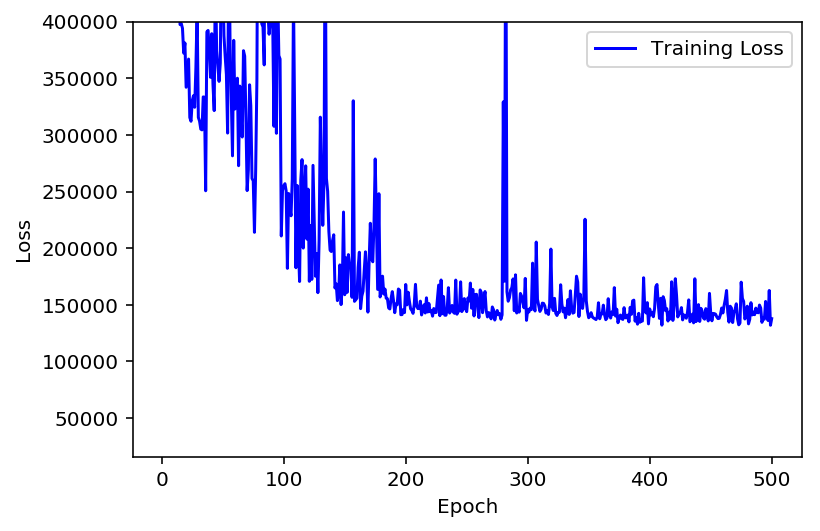

In [92]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
#plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(40000,180000)

plt.show();



In [0]:
predicted=t_model.predict(x_pred_data_enc[cols])

In [0]:

BASE_TRUTH_DIR = Path('/content/drive/My Drive/ML_hw5')

pred_path = str(BASE_TRUTH_DIR / 'predicted_137814.csv')
pd.DataFrame(predicted).to_csv(pred_path)

